# Coffe Shop Analysis

In this project, we've been hired by a large coffee shop with three locations in New York City. The data was provided internally by the comapany itself. They'd like to use analytics to identify factors that contribute to their succes, and ultimately to make data-informed decisions.

Keep in mind that the data is limited, only containing data for the month of April, 2019. These are the specific questions to address this project:

What kinds of products generate the most sales?
What kinds of customers generate the most sales? Can you explain why?
Which segment of its customer base should the company target a marketing campaign towards?

## Importing the Data and Various Python Packages

Below I'm importing the data as well as various Python packages to aid the analysis

In [1]:
# Sample data loaded into a DataFrame
import pandas as pd
import matplotlib.pyplot as plt

# Coffee Shop provided data
data = {
    'transaction_date': ['2019-04-18', '2019-04-13', '2019-04-06', '2019-04-17', '2019-04-06', '2019-04-12', 
                         '2019-04-10', '2019-04-18', '2019-04-21', '2019-04-10', '2019-04-01', '2019-04-25', 
                         '2019-04-21', '2019-04-08', '2019-04-02', '2019-04-20', '2019-04-05', '2019-04-07', 
                         '2019-04-12', '2019-04-11', '2019-04-12', '2019-04-05', '2019-04-10', '2019-04-06', 
                         '2019-04-07', '2019-04-20', '2019-04-24', '2019-04-19', '2019-04-28', '2019-04-20', 
                         '2019-04-02', '2019-04-11', '2019-04-06', '2019-04-09', '2019-04-27', '2019-04-05', 
                         '2019-04-14', '2019-04-02', '2019-04-18', '2019-04-27', '2019-04-12', '2019-04-13', 
                         '2019-04-07', '2019-04-05', '2019-04-15', '2019-04-26', '2019-04-14', '2019-04-02', 
                         '2019-04-24', '2019-04-12', '2019-04-25', '2019-04-03', '2019-04-07', '2019-04-03', 
                         '2019-04-27', '2019-04-07', '2019-04-23', '2019-04-25', '2019-04-03', '2019-04-25', 
                         '2019-04-02', '2019-04-08', '2019-04-21', '2019-04-11', '2019-04-26', '2019-04-02', 
                         '2019-04-09', '2019-04-28', '2019-04-09', '2019-04-09', '2019-04-25', '2019-04-18', 
                         '2019-04-22'],
    'transaction_time': ['6:33:22', '7:17:16', '16:27:42', '6:47:08', '17:33:47', '6:06:24', '7:09:32', '7:33:10', 
                         '14:53:54', '9:06:45', '15:54:39', '16:00:32', '8:56:46', '18:31:48', '17:02:59', '10:47:59', 
                         '10:44:39', '12:12:14', '6:50:31', '11:52:05', '6:57:55', '10:27:45', '11:14:09', '18:09:01', 
                         '4:56:41', '7:07:49', '16:31:04', '7:47:12', '17:39:39', '16:34:24', '18:50:47', '6:06:29', 
                         '18:09:21', '9:44:57', '10:05:25', '15:48:19', '11:11:59', '17:11:47', '6:32:31', '10:20:21', 
                         '17:14:53', '11:41:50', '12:00:24', '14:21:24', '12:09:51', '7:39:02', '9:30:08', '17:15:04', 
                         '13:11:40', '10:34:31', '9:48:24', '10:59:41', '7:30:36', '15:52:38', '10:58:44', '16:02:25', 
                         '5:17:51', '13:06:09', '10:35:20', '15:12:13', '8:16:51', '18:49:47', '20:20:16', '13:13:13', 
                         '14:53:33', '18:07:03', '9:42:25', '7:18:21', '17:18:31', '15:40:21', '9:48:27', '15:13:52', 
                         '10:08:48', '11:48:27', '9:48:23', '12:53:20', '6:33:12', '8:02:43', '18:52:46', '14:50:51', 
                         '17:12:27', '10:35:35', '18:16:20', '13:45:26', '9:36:27', '10:49:27', '15:20:06', '15:33:20', 
                         '9:53:08', '10:46:04', '9:46:58', '15:26:54'],
    'customer_id': [None, 5655, 599, 5572, 5555, None, 8121, None, None, None, 781, None, None, None, 5754, 5667, 5736, 
                    188, None, None, None, 8372, None, 5872, None, None, None, None, None, None, 8447, None, 8378, None, 
                    None, 116, None, 19, None, 8478, None, None, 631, 8155, 5146, None, 8003, 8082, None, 5820, None, 8033, 
                    3, 664, None, None, None, 727, 777, 162, 5790, None, 5353, None, None, 235, None, None, 100, 240, 8394, 
                    8344, None, 734, 8206, 686, None, 350, 546, None, 548, 8227, 26, 289, 700, 8126, None, 8428, None],
    'quantity': [1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 1, 1, 1, 
                 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 
                 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2],
    'line_item_amount': [2.5, 3, 2.5, 6, 7, 3.1, 3, 14, 6, 9, 7, 3.75, 3.25, 3, 3, 3.25, 6.2, 6, 2.5, 3.75, 4.5, 8.5, 7.5, 
                         9, 4, 1, 6, 5, 6, 12, 6, 6, 3, 3.75, 2.5, 3.1, 1.6, 9.5, 3, 4.75, 7.5, 4.9, 2.45, 3.5, 3.1, 0.8, 
                         45, 5, 5, 4.5, 3.5, 6, 6, 6, 8, 8, 9.3, 4, 3.5, 3.5, 3.1, 3.5, 4.75, 2.5, 2, 2.1, 7.5, 5, 6, 3.1, 
                         7, 3.5, 3.5, 3.75, 4.75, 2.5, 2, 2.1, 7.5, 5, 6, 3.5, 3.75, 2.5, 4.4, 5, 9.25, 2.5],
    'unit_price': [2.5, 3, 2.5, 3, 3.5, 3.1, 3, 14, 3, 4.5, 3.5, 3.75, 3.25, 3, 3, 3.25, 3.1, 3, 2.5, 3.75, 4.5, 4.25, 
                   3.75, 4.5, 2, 3.75, 2, 2.5, 3, 4, 3, 3, 3, 3.75, 2.5, 3.1, 0.8, 4.75, 3, 4.75, 3.75, 2.45, 3.5, 3.1, 
                   0.8, 45, 2.5, 2.5, 4.5, 3.5, 3, 3, 3, 4, 4, 3.1, 2, 3.5, 3.5, 3.1, 3.5, 4.75, 2.5, 2, 2.1, 3.75, 2.5, 
                    3, 3.1, 3.5, 3.5, 3.75, 4.75, 2.5, 2, 2.1, 3.75, 2.5, 3, 3.5, 3.75, 2.5, 2.2, 2.5, 9.25, 2.5],
    'product_group': ['Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 
                      'Merchandise', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Food', 'Beverages', 'Food', 
                      'Food', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Food', 'Beverages', 'Beverages', 
                      'Beverages', 'Beverages', 'Food', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 
                      'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Add-ons', 'Beverages', 'Beverages', 
                      'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Add-ons', 'Whole Bean/Teas', 
                      'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 
                      'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 
                      'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 
                      'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 
                      'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 'Beverages', 
                      'Beverages', 'Beverages', 'Beverages', 'Beverages'],
    'product_category': ['Tea', 'Tea', 'Tea', 'Tea', 'Coffee', 'Tea', 'Tea', 'Branded', 'Tea', 'Drinking Chocolate', 
                         'Coffee', 'Coffee', 'Bakery', 'Coffee', 'Bakery', 'Bakery', 'Coffee', 'Coffee', 'Tea', 'Coffee', 
                         'Bakery', 'Coffee', 'Coffee', 'Drinking Chocolate', 'Coffee', 'Bakery', 'Coffee', 'Tea', 'Coffee', 
                         'Tea', 'Coffee', 'Tea', 'Coffee', 'Coffee', 'Tea', 'Tea', 'Flavours', 'Drinking Chocolate', 
                         'Coffee', 'Drinking Chocolate', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Flavours', 
                         'Coffee beans', 'Tea', 'Tea', 'Bakery', 'Bakery', 'Coffee', 'Coffee', 'Tea', 'Coffee', 'Coffee', 
                         'Tea', 'Tea', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Tea', 'Tea', 'Tea', 
                         'Coffee', 'Coffee', 'Bakery', 'Bakery', 'Bakery', 'Coffee', 'Tea', 'Tea', 'Coffee', 'Coffee', 
                         'Coffee', 'Coffee', 'Tea', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Coffee', 'Tea', 
                         'Tea', 'Tea', 'Coffee'],
    'product_type': ['Brewed herbal tea', 'Brewed Black tea', 'Brewed Chai tea', 'Brewed herbal tea', 'Organic brewed coffee', 
                     'Brewed Chai tea', 'Brewed herbal tea', 'Housewares', 'Brewed Chai tea', 'Hot chocolate', 'Organic brewed coffee', 
                     'Premium brewed coffee', 'Scone', 'Drip coffee', 'Scone', 'Scone', 'Premium brewed coffee', 'Drip coffee', 
                     'Brewed Black tea', 'Premium brewed coffee', 'Scone', 'Barista Espresso', 'Premium brewed coffee', 'Hot chocolate', 
                     'Gourmet brewed coffee', 'Pastry', 'Gourmet brewed coffee', 'Brewed herbal tea', 'Gourmet brewed coffee', 
                     'Brewed Chai tea', 'Gourmet brewed coffee', 'Brewed Green tea', 'Drip coffee', 'Premium brewed coffee', 
                     'Brewed Chai tea', 'Brewed Chai tea', 'Regular syrup', 'Hot chocolate', 'Barista Espresso', 'Hot chocolate', 
                     'Barista Espresso', 'Premium brewed coffee', 'Premium brewed coffee', 'Gourmet brewed coffee', 'Premium brewed coffee', 
                     'Regular syrup', 'Premium Beans', 'Brewed Chai tea', 'Brewed Chai tea', 'Scone', 'Pastry', 'Gourmet brewed coffee', 
                     'Gourmet brewed coffee', 'Brewed Black tea', 'Brewed herbal tea', 'Brewed Chai tea', 'Brewed herbal tea', 
                     'Brewed Chai tea', 'Premium brewed coffee', 'Gourmet brewed coffee', 'Biscotti', 'Hot chocolate', 'Premium brewed coffee', 
                     'Hot chocolate', 'Drip coffee', 'Drip coffee', 'Brewed Black tea', 'Brewed Chai tea', 'Brewed Chai tea', 
                     'Barista Espresso', 'Pastry', 'Gourmet brewed coffee', 'Gourmet brewed coffee', 'Barista Espresso', 'Barista Espresso', 
                     'Brewed herbal tea', 'Brewed herbal tea', 'Premium brewed coffee', 'Organic brewed coffee', 'Biscotti', 
                     'Brewed Chai tea', 'Drip coffee', 'Pastry', 'Pastry', 'Brewed Chai tea', 'Barista Espresso', 'Brewed Chai tea', 
                     'Gourmet brewed coffee', 'Gourmet brewed coffee', 'Brewed Chai tea', 'Green tea', 'Brewed Black tea'],
    'current_wholesale_price': [0.63, 0.75, 0.63, 0.75, 0.7, 0.78, 0.75, 4.48, 0.75, 3.38, 0.7, 0.75, 2.11, 0.6, 1.95, 
                                2.11, 0.62, 0.6, 0.63, 0.75, 2.93, 0.85, 0.75, 3.38, 0.4, 2.44, 0.4, 0.63, 0.6, 1, 0.6, 
                                0.75, 0.6, 0.75, 0.63, 0.78, 0.04, 3.56, 0.6, 3.56, 0.75, 0.49, 0.49, 0.7, 0.62, 0.04, 
                                36, 0.63, 0.63, 2.93, 2.11, 0.6, 0.6, 0.63, 0.75, 1, 0.75, 1, 0.62, 0.4, 2.28, 2.63, 0.62, 
                                3.56, 0.5, 3.56, 0.75, 0.63, 0.63, 0.85, 2.44, 0.5, 0.4, 0.6, 0.75, 0.63, 0.75, 0.62, 0.7, 
                                2.28, 0.78, 0.5, 2.44, 2.44, 1, 0.75, 0.63, 0.4, 0.44, 2.5, 0.63, 0.63, 2.5],
    'customer_since': [None, '2018-06-15', '2018-09-12', '2017-04-06', '2019-03-19', None, '2018-03-25', None, None, 
                       None, '2018-11-02', None, None, None, '2018-02-01', '2017-04-28', '2017-01-04', '2018-06-04', 
                       None, None, None, '2017-01-21', None, '2018-03-12', None, None, None, None, None, None, '2017-05-06', 
                       None, '2017-04-16', None, None, '2017-11-17', None, '2017-02-23', None, '2017-07-30', None, None, 
                       '2018-11-17', '2017-01-30', '2018-10-17', None, '2017-01-19', '2017-08-17', None, '2018-03-06', 
                       None, '2018-09-16', '2017-01-10', '2019-01-24', None, None, None, '2017-08-13', '2018-09-30', 
                       '2018-03-24', '2018-02-12', None, '2017-07-18', None, None, '2018-10-11', None, None, '2017-10-04', 
                       '2018-10-25', '2017-03-31', '2018-01-14', None, '2017-10-10', '2018-02-06', '2019-03-11', None, 
                       '2017-04-15', '2018-05-25', None, '2018-05-29', '2019-04-07', '2017-03-14', '2019-03-09', '2019-04-09', 
                       '2017-06-04', None, '2019-02-01', None],
    'customer_birth_year': [None, 1993, 1988, 1956, 1999, None, 1996, None, None, None, 1991, None, None, None, 1990, 1983, 
                            1980, 1982, None, None, None, 1997, None, 1977, None, None, None, None, None, None, 2000, None, 
                            1998, None, None, 1969, None, 1953, None, 1971, None, None, 1992, 1987, 1996, None, 1991, 1981, 
                            None, 1991, None, 1994, 1950, 1996, None, None, None, 1964, 1989, 1977, 1975, None, 1985, None, 
                            None, 1990, None, None, 1967, 1991, 1991, 1988, None, 1967, 1986, 1999, None, 1956, 1981, None, 
                            1981, 1952, 1954, 1999, 2001, 1960, None, 1964, None],
    'customer_generation': [None, 'Younger Millennials', 'Older Millennials', 'Baby Boomers', 'Gen Z', None, 'Gen Z', None, 
                            None, None, 'Younger Millennials', None, None, None, 'Younger Millennials', 'Older Millennials', 
                            'Older Millennials', 'Older Millennials', None, None, None, 'Gen Z', None, 'Gen X', None, None, 
                            None, None, None, None, 'Gen Z', None, 'Gen Z', None, None, 'Gen X', None, 'Baby Boomers', None, 
                            'Gen X', None, None, 'Younger Millennials', 'Older Millennials', 'Gen Z', None, 'Younger Millennials', 
                            'Older Millennials', None, 'Younger Millennials', None, 'Younger Millennials', 'Baby Boomers', 'Gen Z', 
                            None, None, None, 'Baby Boomers', 'Older Millennials', 'Gen X', 'Gen X', None, 'Older Millennials', 
                            None, None, 'Younger Millennials', None, None, 'Gen X', 'Younger Millennials', 'Younger Millennials', 
                            'Older Millennials', None, 'Gen X', 'Older Millennials', 'Gen Z', None, 'Baby Boomers', 'Older Millennials', 
                            None, 'Older Millennials', 'Baby Boomers', 'Baby Boomers', 'Gen Z', 'Gen Z', 'Baby Boomers', None, 
                            'Baby Boomers', None]
}

# Check for length consistency across all arrays
lengths = {key: len(value) for key, value in data.items()}
lengths


{'transaction_date': 73,
 'transaction_time': 92,
 'customer_id': 89,
 'quantity': 96,
 'line_item_amount': 88,
 'unit_price': 86,
 'product_group': 90,
 'product_category': 90,
 'product_type': 92,
 'current_wholesale_price': 93,
 'customer_since': 89,
 'customer_birth_year': 89,
 'customer_generation': 89}

The data needs to be trimmed in order to analyze it

In [2]:
# Trimming all arrays to 73 elements and filling in None for shorter arrays

max_length = 73  # Based on the length of the 'transaction_date' array

for key in data.keys():
    if len(data[key]) > max_length:
        data[key] = data[key][:max_length]  # Trim to max_length
    elif len(data[key]) < max_length:
        data[key].extend([None] * (max_length - len(data[key])))  # Fill with None

# Check the lengths again to ensure they are all the same
lengths = {key: len(value) for key, value in data.items()}
lengths


{'transaction_date': 73,
 'transaction_time': 73,
 'customer_id': 73,
 'quantity': 73,
 'line_item_amount': 73,
 'unit_price': 73,
 'product_group': 73,
 'product_category': 73,
 'product_type': 73,
 'current_wholesale_price': 73,
 'customer_since': 73,
 'customer_birth_year': 73,
 'customer_generation': 73}

## Investigate the Data

Let's see what type of information this data has. I believe this data has not been cleaned either. We might have to do something about that

In [3]:
# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_date         73 non-null     object 
 1   transaction_time         73 non-null     object 
 2   customer_id              36 non-null     float64
 3   quantity                 73 non-null     int64  
 4   line_item_amount         73 non-null     float64
 5   unit_price               73 non-null     float64
 6   product_group            73 non-null     object 
 7   product_category         73 non-null     object 
 8   product_type             73 non-null     object 
 9   current_wholesale_price  73 non-null     float64
 10  customer_since           36 non-null     object 
 11  customer_birth_year      36 non-null     float64
 12  customer_generation      36 non-null     object 
dtypes: float64(5), int64(1), object(7)
memory usage: 7.5+ KB


In [4]:
# Display the first few rows of the DataFrame
print(df.head())

# Check the data types and missing values
print(df.info())

  transaction_date transaction_time  customer_id  quantity  line_item_amount  \
0       2019-04-18          6:33:22          NaN         1               2.5   
1       2019-04-13          7:17:16       5655.0         1               3.0   
2       2019-04-06         16:27:42        599.0         1               2.5   
3       2019-04-17          6:47:08       5572.0         2               6.0   
4       2019-04-06         17:33:47       5555.0         2               7.0   

   unit_price product_group product_category           product_type  \
0         2.5     Beverages              Tea      Brewed herbal tea   
1         3.0     Beverages              Tea       Brewed Black tea   
2         2.5     Beverages              Tea        Brewed Chai tea   
3         3.0     Beverages              Tea      Brewed herbal tea   
4         3.5     Beverages           Coffee  Organic brewed coffee   

   current_wholesale_price customer_since  customer_birth_year  \
0                     0.63

After trimming the data to 73 entries, only 36 of those have 'rewards' customers. Any missing data has been filled in with 'None' or 'NaN'. Before we get to the analysis I'd like to make a statement. We DON'T have sufficient data to make any definitive recommendations. There are many factors missing such as time constrains, we only have data for this coffee shop, and the exact locations are missing. To name a few.

## Visualizing the Data

### What kinds of products generate the most sales?

** Bar Plot of Total Sales by Product Category**

The total sales of each product will be visualized by using a bar plot in decending order.

In [5]:
# Convert line_item_amount to numeric in case it's not
df['line_item_amount'] = pd.to_numeric(df['line_item_amount'], errors='coerce')

# Group by product_category and sum the line_item_amount
total_sales_by_category = df.groupby('product_category')['line_item_amount'].sum()

# Sort the results to identify the categories with the highest sales
sorted_sales_by_category = total_sales_by_category.sort_values(ascending=False)

# Display the results
sorted_sales_by_category

product_category
Coffee                169.25
Tea                    98.10
Coffee beans           45.00
Bakery                 36.60
Drinking Chocolate     32.25
Branded                14.00
Flavours                2.40
Name: line_item_amount, dtype: float64

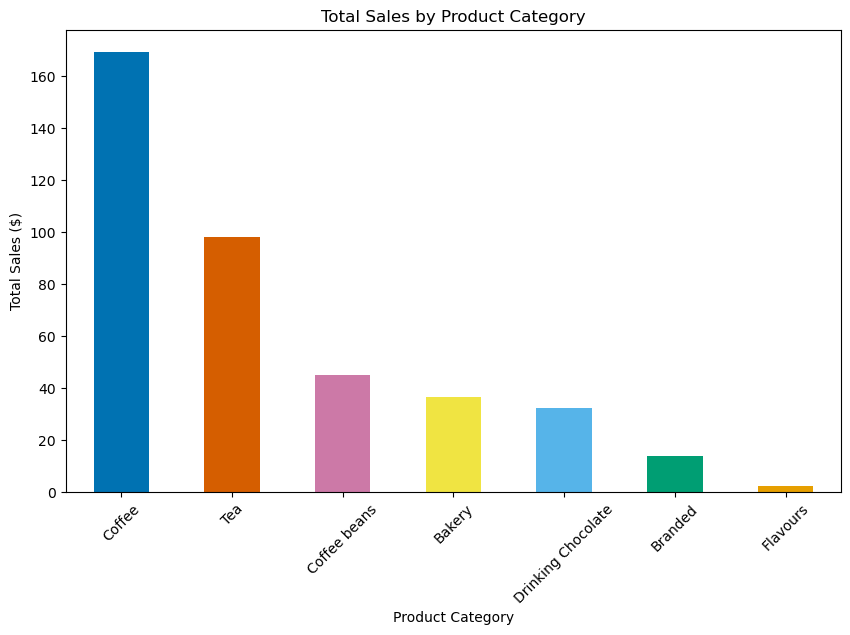

In [7]:
# Define the colorblind-friendly color palette
colorblind_palette = ['#0072B2', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9', '#009E73', '#E69F00']

# Plotting the bar chart with the colorblind-friendly palette
plt.figure(figsize=(10, 6))
sorted_sales_by_category.plot(kind='bar', color=colorblind_palette)

# Adding title and labels
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

# Display the plot
plt.show()

We can see that the top three products are Coffee, Tea, and Coffee Beans

### What kinds of customers generate the most sales? 

**Bar Plot of Total Sales by Customer Generation**

We'll group the data by customer_generation and sum the line_item_amount to get the total sales for each customer generation.

In [8]:
# Group by customer_generation and sum the line_item_amount
total_sales_by_generation = df.groupby('customer_generation')['line_item_amount'].sum()

# Sort the results to identify the generations with the highest sales
sorted_sales_by_generation = total_sales_by_generation.sort_values(ascending=False)

# Display the results
sorted_sales_by_generation


customer_generation
Younger Millennials    83.15
Older Millennials      38.20
Gen Z                  36.60
Gen X                  29.45
Baby Boomers           25.50
Name: line_item_amount, dtype: float64

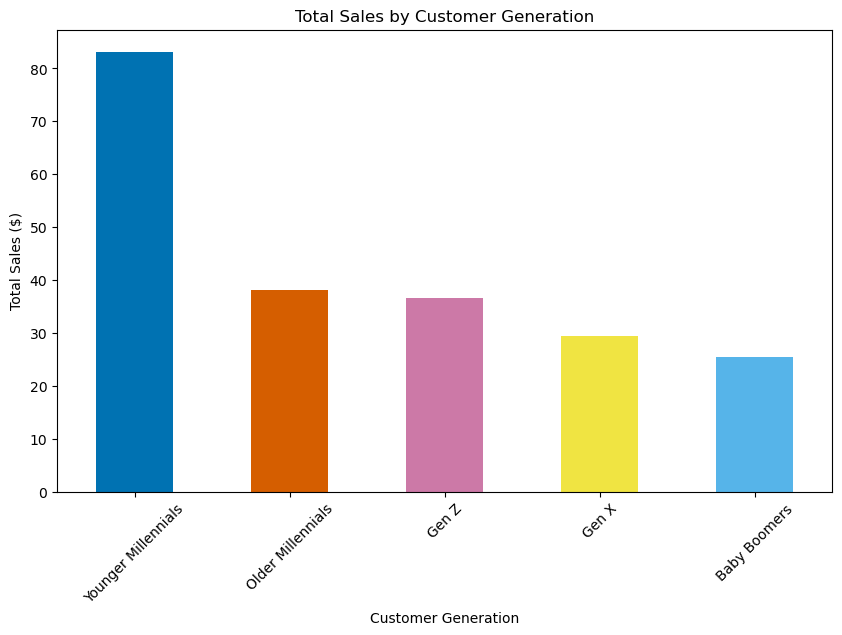

In [9]:
# Plotting the bar chart with the colorblind-friendly palette
plt.figure(figsize=(10, 6))
sorted_sales_by_generation.plot(kind='bar', color=colorblind_palette)

# Adding title and labels
plt.title('Total Sales by Customer Generation')
plt.xlabel('Customer Generation')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

# Display the plot
plt.show()


This bar plot shows that Younger Mellennials purchase more than double the total sales that the next generation does, Older Millennials. I'm a bit suprised to see a huge difference in sales. I did imagine Millennials would be the ones who purchased more at the coffee shops. No suprise to see Baby Boomers last though.

We can now answer, which segment of its customer base should the company target a marketing campaign towards? The most valuable customer group, Younger Millennials. Being in a slighly different life stage, the company should make an effort to target Older Millennials as well. Out of the top three, they would have the most purchasing power. I did want to mention Gen Z, as they would more than likely replace Younger Millennials in the near future. I do want to iterate that there isn't significant enough data to support any claims made in this notebook.